In [36]:
from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

**Tracking Unique Insect Species in the City of Melbourne**

Authored by: Rohang Shah
Duration: 90 mins
Level: Intermediate
Pre-requisite Skills: Python, Data Analysis, Geospatial Analysis


In the context of urban biodiversity, tracking the presence and distribution of unique insect species can significantly aid in conservation efforts. This use case focuses on identifying and monitoring areas within the City of Melbourne where certain insect species are found uniquely, compared to other areas. By analyzing the insect records collected from the Little Things that Run the City Project and subsequent Melbourne BioBlitz events, the City of Melbourne can pinpoint locations where rare or unique insect species are present. This enables the city to focus conservation efforts on these critical areas to protect and preserve these species and their habitats.

**What this Use Case Will Teach You**
At the end of this use case, you will:

*   Learn how to access and manipulate City of Melbourne Open Data.
*   Develop skills in geospatial data analysis.
*   Gain experience in identifying patterns and anomalies in biodiversity data.
*   Understand how to use data analysis to inform conservation strategies.


**Introduction or Background**
Urbanization poses a significant threat to biodiversity. The City of Melbourne, through projects like the Little Things that Run the City and Melbourne BioBlitz events, has collected valuable data on insect species within the city. This data can be leveraged to identify and protect unique insect species and their habitats. By focusing conservation efforts on areas where these species are found, the City of Melbourne can enhance its biodiversity and ensure the sustainability of its ecosystems.


**User Story**
Title: Protecting Melbourne's Unique Insect Species
As a conservation biologist working with the City of Melbourne, I want to identify and monitor areas within the city where certain insect species are uniquely found so that I can focus conservation efforts on these critical habitats to protect and preserve these species and their ecosystems.

**Scenario**
The City of Melbourne has been collecting insect data through the "Little Things that Run the City" project and the Melbourne BioBlitz events. This data includes observations of various insect species across different locations in the city. As a conservation biologist, my goal is to analyze this data to pinpoint areas with unique insect species that are not found elsewhere. By identifying these critical habitats, the city can prioritize conservation efforts, allocate resources effectively, and develop strategies to protect these unique species from urban development and other threats.







In [ ]:
import requests
import pandas as pd
from io import StringIO
from tabulate import tabulate

def collect_data(dataset_id, apikey=""):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    suffix = 'exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true'

    url = f'{base_url}{dataset_id}/{suffix}'
    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey
    }

    response = requests.get(url, params=params)
    response.raise_for_status()

    # Load the CSV data into a DataFrame
    df = pd.read_csv(StringIO(response.text), delimiter=';')
    return df

# List of dataset IDs
dataset_ids = [
    'insect-records-in-the-city-of-melbourne-from-little-things-that-run-the-city',
    'wildlife-sightings-bioblitz-2014',
    'bioblitz-2016'
]

API_KEY = ""  # Add your API key here if required

# Loop through each dataset ID and process the data
for dataset_id in dataset_ids:
    print(f"Processing dataset: {dataset_id}")

    # Fetch the data
    df = collect_data(dataset_id, apikey=API_KEY)

    # Display data summary
    print("\nDataFrame Info:")
    print(tabulate(df.info(), headers='keys', tablefmt='psql'))

    print("\nDataFrame Description:")
    print(tabulate(df.describe(include='all'), headers='keys', tablefmt='psql'))

    print("\nFirst 5 Rows of DataFrame:")
    print(tabulate(df.head(), headers='keys', tablefmt='psql'))
    print("\n" + "="*50 + "\n")  # Separator between datasets


Processing dataset: insect-records-in-the-city-of-melbourne-from-little-things-that-run-the-city

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  1295 non-null   object 
 1   kingdom               1295 non-null   object 
 2   phylum                1295 non-null   object 
 3   class                 1295 non-null   object 
 4   order                 1295 non-null   object 
 5   family                1290 non-null   object 
 6   genus                 589 non-null    object 
 7   species               264 non-null    object 
 8   identification_notes  1031 non-null   object 
 9   location              1295 non-null   object 
 10  sighting_date         0 non-null      float64
dtypes: float64(1), object(10)
memory usage: 111.4+ KB


DataFrame Description:
+--------+--------+-----------+-----

In [41]:
import requests
import pandas as pd
from io import StringIO
from tabulate import tabulate  # Import tabulate for pretty tables

def collect_data(dataset_id, apikey=""):
    """
    Collect data from the Melbourne open data platform using the specified dataset ID.
    Parameters:
    dataset_id (str): The ID of the dataset to retrieve.
    apikey (str): The API key for authentication (default is an empty string).

    Returns:
    pd.DataFrame: The dataset in a Pandas DataFrame.
    """
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    suffix = 'exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true'

    url = f'{base_url}{dataset_id}/{suffix}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey  # Provided API key, if any
    }

    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Load the CSV data into a DataFrame
    df = pd.read_csv(StringIO(response.text), delimiter=';')
    return df

# Dataset ID
DATASET_ID = 'bioblitz-2016'

# Hide API key (use an environment variable or pass it directly when calling the function)
API_KEY = ""  # Ensure this is set to the correct API key when used in a secure environment

# Fetch data
df = collect_data(DATASET_ID, apikey=API_KEY)

# Display data summary
print("DataFrame Info:")
print(tabulate(df.info(), headers='keys', tablefmt='psql'))  # Display DataFrame information in table format

print("\nDataFrame Description:")
print(tabulate(df.describe(include='all'), headers='keys', tablefmt='psql'))  # Display descriptive statistics in table format

print("\nFirst 5 Rows of DataFrame:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))  # Display the first few rows of the DataFrame in table format


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  1353 non-null   object 
 1   kingdom               1353 non-null   object 
 2   phylum                1322 non-null   object 
 3   class                 1314 non-null   object 
 4   order                 1177 non-null   object 
 5   family                1139 non-null   object 
 6   genus                 953 non-null    object 
 7   species               846 non-null    object 
 8   common_name           802 non-null    object 
 9   identification_notes  588 non-null    object 
 10  data_resource_name    1356 non-null   object 
 11  sighting_date         1350 non-null   object 
 12  latitude              1356 non-null   float64
 13  longitude             1353 non-null   float64
 14  location              0 non-null      float64
 15  geopo

Displaying the records in the dataset

In [ ]:

num_records = df.shape[0]
print(f"Number of records in the dataset: {num_records}")


Number of records in the dataset: 1356


Inspecting the column names

In [ ]:

print("Column Names:")
print(df.columns)


Column Names:
Index(['taxa', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'species', 'common_name', 'identification_notes', 'data_resource_name',
       'sighting_date', 'latitude', 'longitude', 'location', 'geopoint'],
      dtype='object')


Data cleaning

In [40]:
# Define a function to extract latitude and longitude from 'geopoint' or 'location' column
def extract_coordinates(row):
    try:
        # If geopoint exists and is in the format "(lat, lon)"
        if pd.notnull(row['geopoint']):
            lat, lon = row['geopoint'].strip('()').split(',')
        elif pd.notnull(row['location']):  # Fallback to location
            lat, lon = row['location'].strip('()').split(',')
        else:
            return None, None
        return float(lat), float(lon)
    except Exception as e:
        return None, None

# Apply the function to create 'latitude' and 'longitude' columns
df['latitude'], df['longitude'] = zip(*df.apply(extract_coordinates, axis=1))

# Drop rows where latitude or longitude are missing
df_cleaned = df.dropna(subset=['latitude', 'longitude'])

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Display cleaned DataFrame information
print("\nCleaned DataFrame Info:")
print(df_cleaned.info())



Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 0 to 1352
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  1353 non-null   object 
 1   kingdom               1353 non-null   object 
 2   phylum                1322 non-null   object 
 3   class                 1314 non-null   object 
 4   order                 1177 non-null   object 
 5   family                1139 non-null   object 
 6   genus                 953 non-null    object 
 7   species               846 non-null    object 
 8   common_name           802 non-null    object 
 9   identification_notes  588 non-null    object 
 10  data_resource_name    1353 non-null   object 
 11  sighting_date         1350 non-null   object 
 12  latitude              1353 non-null   float64
 13  longitude             1353 non-null   float64
 14  location              0 non-null      float64
 15  g

Data Analysis - Identifying unique species

In [43]:
# Standardize the 'taxa' column to ensure consistent filtering
df_cleaned['taxa'] = df_cleaned['taxa'].str.strip().str.title()

# Filter the DataFrame to include only insect records
df_insects = df_cleaned[df_cleaned['taxa'] == 'Insect']

# Drop rows where 'genus' or 'species' is NaN
df_insects = df_insects.dropna(subset=['genus', 'species'])

# Combine 'genus' and 'species' to create full scientific names
df_insects['full_species_name'] = df_insects['genus'].str.strip() + ' ' + df_insects['species'].str.strip()

# Get unique full species names
unique_full_species = df_insects['full_species_name'].unique()

# Count the number of unique insect species with full names
num_unique_full_species = len(unique_full_species)
print(f"Number of unique insect species (full names): {num_unique_full_species}")

# Display unique insect species full names
print("Unique insect species full names:")
print(unique_full_species)


Number of unique insect species (full names): 86
Unique insect species full names:
['Xanthogaleruca luteola' 'Apis mellifera' 'Anax papuensis'
 'Papilio anactus' 'Lophyrotoma zonalis' 'Theclinesthes serpentatus'
 'Pieris rapae' 'Scoparia exhibitalis' 'Nysius vinitor'
 'Ecnolagria grandis' 'Homalictus sphecodoides' 'Naupactus leucoloma'
 'Chortoicetes terminifera' 'Tebenna micalis' 'Illeis galbula'
 'Ischnura heterosticta' 'Scolypopa australis' 'Meyriccia latro'
 'Phacodes personatus' 'Achyra affinitalis' 'Arrade leucocosmalis'
 'Cydalima diaphanalis' 'Hednota relatalis' 'Hellula hydralis'
 'Labdia deliciosella' 'Mallada signatus' 'Parosteodes fictiliaria'
 'Persectania ewingii' 'Phrissogonus laticostata' 'Plectophila discalis'
 'Teleogryllus commodus' 'Utetheisa pulchelloides' 'Vespula germanica'
 'Pleistodontes froggatti' 'Zizina otis' 'Trichiocercus sparshalli'
 'Hygraula nitens' 'Scenedra decoratalis' 'Tachystola acroxantha'
 'Thallarcha partita' 'Amegilla asserta' 'Austrolestes ana

Spatial distribution

In [46]:
# Drop rows where species is missing
df_cleaned = df_cleaned.dropna(subset=['species'])

# Create the GeoDataFrame again with the cleaned data
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned['longitude'], df_cleaned['latitude']))

# Display GeoDataFrame information and first 5 rows again
print("\nGeoDataFrame Info:")
print(gdf.info())
print("\nFirst 5 Rows of GeoDataFrame:")
print(gdf.head())



GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 846 entries, 10 to 1352
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   taxa                  846 non-null    object  
 1   kingdom               846 non-null    object  
 2   phylum                846 non-null    object  
 3   class                 846 non-null    object  
 4   order                 846 non-null    object  
 5   family                846 non-null    object  
 6   genus                 846 non-null    object  
 7   species               846 non-null    object  
 8   common_name           802 non-null    object  
 9   identification_notes  101 non-null    object  
 10  data_resource_name    846 non-null    object  
 11  sighting_date         845 non-null    object  
 12  latitude              846 non-null    float64 
 13  longitude             846 non-null    float64 
 14  location              0 non-null 

Map visualization using folium

In [47]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
import numpy as np

# Remove rows with missing lat/lon values
df_cleaned = df.dropna(subset=['latitude', 'longitude'])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned['longitude'], df_cleaned['latitude']))

# Initialize a map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add markers for each insect observation (only valid locations)
for _, row in gdf.iterrows():
    if not np.isnan(row['latitude']) and not np.isnan(row['longitude']):
        folium.Marker([row['latitude'], row['longitude']], popup=row['species']).add_to(m)

# Display the map
m.save('insect_distribution_map.html')

# Perform DBSCAN clustering (adjust eps if needed)
coords = gdf[['latitude', 'longitude']].values
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
gdf['cluster'] = db.labels_

# Visualize clusters using different colors
colors = np.array(['red', 'blue', 'green', 'orange', 'purple'])  # Add more colors if needed
m_cluster = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

for cluster in gdf['cluster'].unique():
    cluster_data = gdf[gdf['cluster'] == cluster]
    cluster_color = colors[cluster % len(colors)]  # Assign color by cluster
    for _, row in cluster_data.iterrows():
        if not np.isnan(row['latitude']) and not np.isnan(row['longitude']):
            folium.Marker([row['latitude'], row['longitude']],
                          popup=f"Species: {row['species']} (Cluster: {cluster})",
                          icon=folium.Icon(color=cluster_color)).add_to(m_cluster)

# Display the clustered map
m_cluster.save('insect_clusters_map.html')

# Output the map
m_cluster


Time series analysis

Purpose and How It Helps:
Time Series Analysis: This analysis helps in understanding how insect sightings fluctuate over time. This is crucial for tracking seasonal variations or trends in insect activity.
Conservation Insights: By identifying peaks and drops in sightings of specific species, conservationists can infer patterns about species behavior, habitat usage, and potential environmental impacts (e.g., temperature or urbanization).

Output:
The output will be a plot that shows the monthly number of sightings for various species. Each line represents the sighting trend for one species, and the chart will provide insights into which species are more frequently observed in certain months.

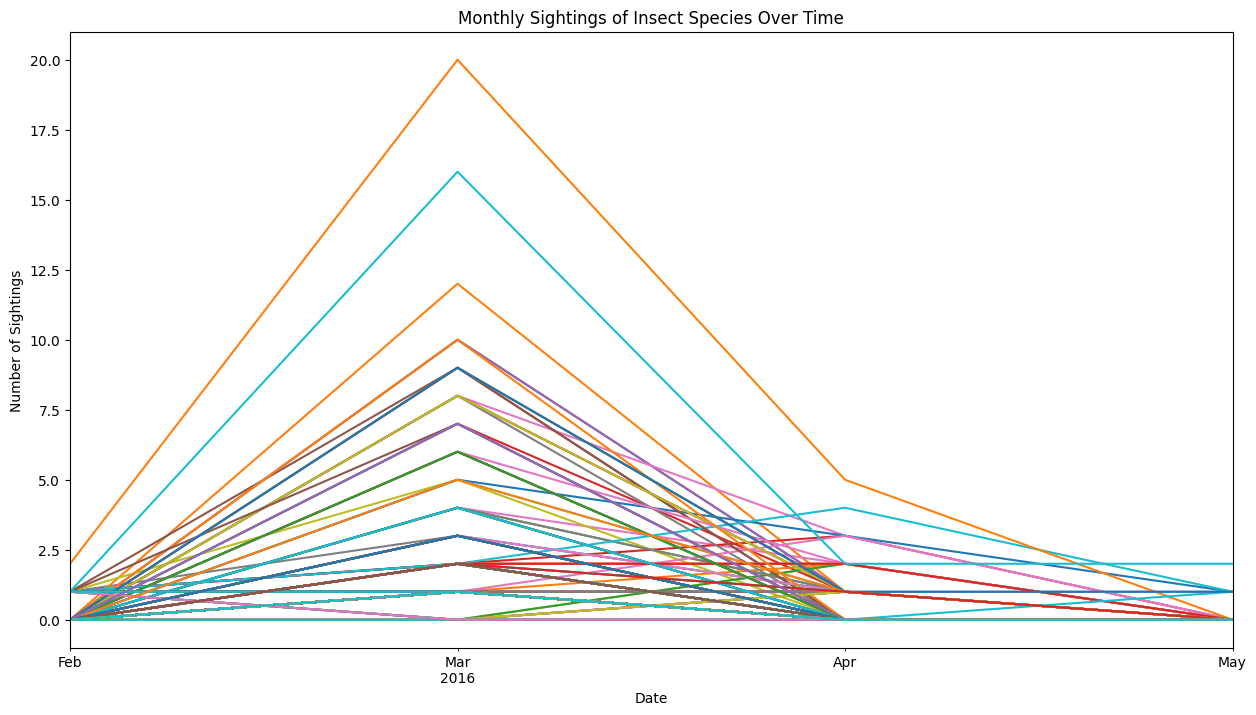

In [48]:
import matplotlib.pyplot as plt


df['sighting_date'] = pd.to_datetime(df['sighting_date'], errors='coerce')
df = df.dropna(subset=['sighting_date'])

# Group by date and species, and count the number of sightings
time_series = df.groupby([df['sighting_date'].dt.to_period('M'), 'species']).size().unstack().fillna(0)

# Plot time series for selected species
time_series.plot(figsize=(15, 8), legend=False)
plt.title('Monthly Sightings of Insect Species Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.show()


Plan:
Filter Top 10 Species: Focus on the top 10 species with the highest number of sightings to reduce clutter and make the plot clearer.
Moving Averages: Smooth out the line trends using a rolling average.
Distinct Highlighting: Highlight certain rare or unique species to emphasize their trends.

Improvements:
Top 10 Species: This focuses on the species with the highest number of sightings, reducing clutter.
Moving Average: A 2-month rolling average smooths the lines to give a clearer view of trends.
Highlight Specific Species: You can adjust the highlight_species list to focus on species of interest (such as rare species or those with unique trends).

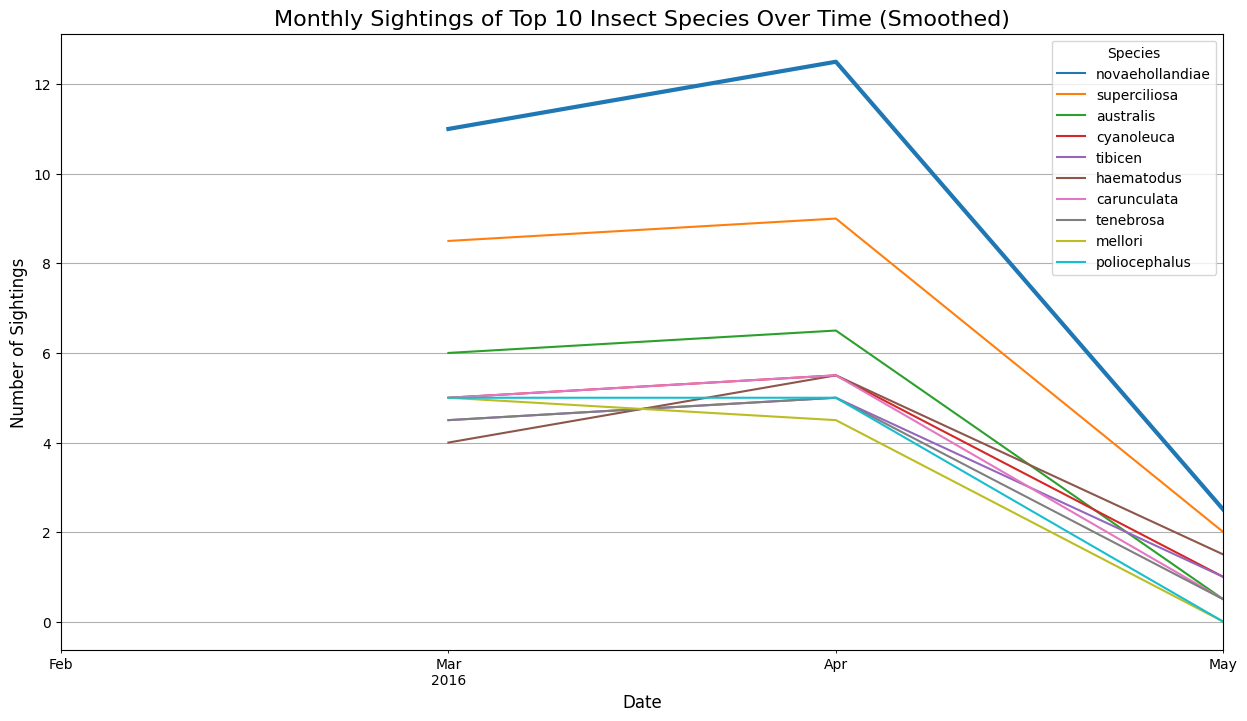

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'sighting_date' to datetime
df['sighting_date'] = pd.to_datetime(df['sighting_date'], errors='coerce')
df = df.dropna(subset=['sighting_date'])

# Group by date and species, and count the number of sightings
time_series = df.groupby([df['sighting_date'].dt.to_period('M'), 'species']).size().unstack().fillna(0)

# Calculate total sightings per species to filter the top 10
top_species = time_series.sum().sort_values(ascending=False).head(10).index

# Filter the time series to only include the top 10 species
filtered_time_series = time_series[top_species]

# Apply a rolling average (e.g., 2 months) to smooth out fluctuations
smoothed_time_series = filtered_time_series.rolling(window=2).mean()

# Plot the smoothed time series for the top 10 species
plt.figure(figsize=(15, 8))
smoothed_time_series.plot(ax=plt.gca())

# Customize the plot
plt.title('Monthly Sightings of Top 10 Insect Species Over Time (Smoothed)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sightings', fontsize=12)
plt.legend(title='Species', loc='upper right')
plt.grid(True)

# Highlighting certain species (customize this list as needed)
highlight_species = ['ficifolia', 'novaehollandiae', 'melanocephala']  # Add species names here
for species in highlight_species:
    if species in smoothed_time_series.columns:
        plt.plot(smoothed_time_series.index, smoothed_time_series[species], linewidth=3, label=f'{species} (highlighted)')

# Show the plot
plt.show()


Species Diversity Indices: Understanding Their Importance
Species diversity indices are crucial tools in ecology and conservation biology. They provide quantitative measures of biodiversity within a specific area, helping researchers, conservationists, and decision-makers understand the richness and evenness of species distributions. Here’s how they help:

1. Assessing Ecosystem Health
Biodiversity as an Indicator: Higher species diversity often indicates a healthier ecosystem. Diverse ecosystems are generally more resilient to disturbances, such as climate change, pollution, or invasive species.
Detection of Imbalance: A low diversity index could signal ecological problems, such as habitat destruction or over-predation, requiring conservation efforts.
2. Conservation Planning
Prioritization of Areas: By calculating diversity indices across different locations, conservationists can identify biodiversity hotspots that require protection. Areas with higher species diversity might be prioritized for conservation efforts.
Tracking Changes Over Time: Monitoring changes in diversity indices over time helps in assessing the impact of conservation actions or the effects of external pressures on biodiversity.
3. Understanding Community Structure
Species Richness and Evenness: These indices combine two important aspects of biodiversity—richness (the number of different species) and evenness (how equally individuals are distributed among those species). A balanced ecosystem tends to have a high evenness, meaning no single species dominates.
Comparative Analysis: Researchers can compare the diversity indices of different ecosystems or habitats to understand which areas are more diverse and why. This comparison can also extend to different time periods to see how diversity changes.

Shannon Index (Shannon-Wiener Index) - This index accounts for both abundance and evenness of species present. Higher values indicate greater diversity.

Simpson's Index - This index measures the probability that two individuals randomly selected from a sample will belong to different species. Values close to 1 indicate high diversity.

In [51]:
import numpy as np

def shannon_index(df, species_col):
    species_counts = df[species_col].value_counts()
    total = species_counts.sum()
    proportions = species_counts / total
    return -np.sum(proportions * np.log(proportions))

# Calculate Shannon Index
shannon = shannon_index(df, 'species')
print(f"Shannon Diversity Index: {shannon}")

def simpsons_index(df, species_col):
    species_counts = df[species_col].value_counts()
    total = species_counts.sum()
    proportions = species_counts / total
    return 1 - np.sum(proportions**2)

# Calculate Simpson's Index
simpson = simpsons_index(df, 'species')
print(f"Simpson's Diversity Index: {simpson}")

Shannon Diversity Index: 5.525671620398309
Simpson's Diversity Index: 0.9936346766569798


Shannon Diversity Index: 5.53

High diversity: A Shannon index value of 5.53 indicates a high diversity of insect species. The higher the Shannon index, the more evenly species are distributed and the richer the ecosystem in terms of species count.
Significance for your project: This high value suggests that the insect species in your dataset are diverse, meaning there is a wide variety of species in the areas sampled. For conservation purposes, areas with high Shannon diversity may be targeted for preservation efforts due to their rich biodiversity.
Simpson's Diversity Index: 0.993

Near maximum diversity: The Simpson's index close to 1 (0.993) means there is a very high likelihood that two randomly selected insect species from your dataset would be from different species. This further confirms that the insect population in the areas sampled is highly diverse.
Significance for your project: A high Simpson index reinforces the idea that these areas contain a wide variety of species, and the ecosystem is not dominated by just a few species. It may indicate that these areas are ecologically balanced, which is crucial for making decisions regarding which regions should be prioritized for conservation.

In [55]:
import geopandas as gpd
import pandas as pd
import numpy as np

# Function to calculate Shannon Index for a region
def calculate_shannon(df, group_col, species_col):
    grouped = df.groupby(group_col)[species_col].value_counts()
    shannon_indices = {}

    for group, species_counts in grouped.groupby(level=0):
        total = species_counts.sum()
        proportions = species_counts / total
        shannon_index = -np.sum(proportions * np.log(proportions))
        shannon_indices[group] = shannon_index

    return pd.Series(shannon_indices)

# Function to calculate Simpson's Index for a region
def calculate_simpson(df, group_col, species_col):
    grouped = df.groupby(group_col)[species_col].value_counts()
    simpson_indices = {}

    for group, species_counts in grouped.groupby(level=0):
        total = species_counts.sum()
        proportions = species_counts / total
        simpson_index = 1 - np.sum(proportions ** 2)
        simpson_indices[group] = simpson_index

    return pd.Series(simpson_indices)

# Assuming 'region' is the neighborhood or park area and 'species' is the species column
shannon_per_region = calculate_shannon(df_cleaned, 'location', 'species')
simpson_per_region = calculate_simpson(df_cleaned, 'location', 'species')

# Display results
print("Shannon Diversity Index per Region:")
print(shannon_per_region)

print("Simpson Diversity Index per Region:")
print(simpson_per_region)


Shannon Diversity Index per Region:
Series([], dtype: object)
Simpson Diversity Index per Region:
Series([], dtype: object)


Focus on Rare Species: Identifies rare species (those with fewer sightings) and plots them on a map. This helps to visualize whether these species are concentrated in specific areas, which may need special conservation efforts.

In [57]:
# Define a threshold for rare species (e.g., species seen fewer than 5 times)
rare_species_threshold = 5
species_counts = df_cleaned['species'].value_counts()
rare_species = species_counts[species_counts < rare_species_threshold].index

# Filter the data for only rare species
rare_species_data = df_cleaned[df_cleaned['species'].isin(rare_species)]

# Plot rare species on a map to see if they are clustered in specific areas
import folium

m_rare = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add markers for rare species
for _, row in rare_species_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['species']).add_to(m_rare)

# Save the map
m_rare.save('rare_species_map.html')

# Output the map
m_rare


K-Means Clustering and Heatmaps for Hotspot Analysis: Their Importance in Analyzing Species Data
K-Means Clustering and heatmaps are powerful tools used in data analysis, particularly for identifying patterns and visualizing hotspots. In the context of analyzing species data in the City of Melbourne, these techniques can provide valuable insights into the distribution and concentration of species across different areas. Here’s how they can help in your task:

K-Means Clustering: Identifying Groupings and Patterns
K-Means Clustering is an unsupervised machine learning algorithm that groups data points into a specified number of clusters based on their similarity. It helps in identifying natural groupings within the data, which is particularly useful when analyzing spatial data such as species distributions.


Heatmaps: Visualizing Hotspots
Heatmaps are a visualization tool that represents data density or concentration using colors. In species analysis, heatmaps are particularly useful for identifying areas with high concentrations of species, also known as hotspots.

Combined Power of K-Means and Heatmaps
K-Means Clustering: This technique helps in identifying natural groupings and patterns in species data, simplifying the complexity of ecological data and aiding in hotspot detection.
Heatmaps: These visual tools highlight areas with high species concentrations, making it easier to identify and prioritize biodiversity hotspots for conservation.
By using K-Means clustering and heatmaps together, you can effectively analyze and visualize species distribution patterns, identify key areas for conservation, and communicate these findings to stakeholders. This combined approach enhances your ability to make data-driven decisions that support biodiversity preservation in the City of Melbourne.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


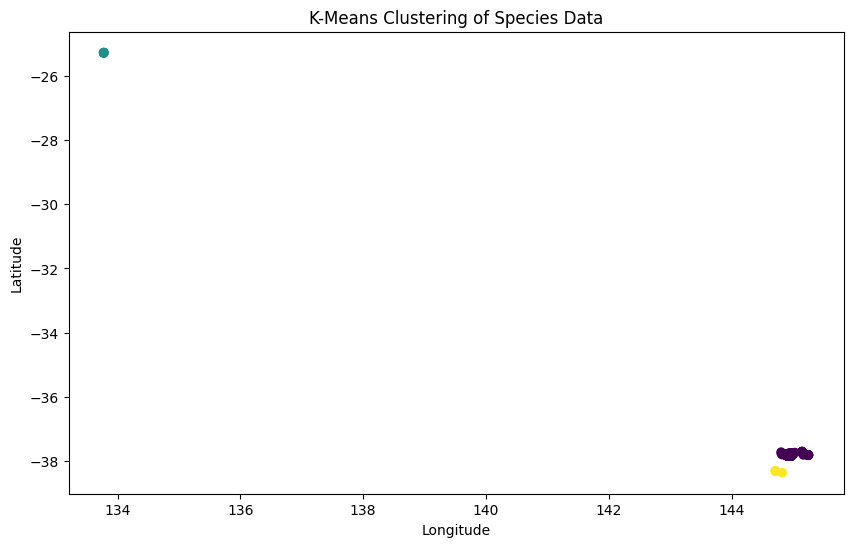

In [53]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering of Species Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [54]:
import folium
from folium.plugins import HeatMap

# Create a heatmap of species sightings
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map
m.save('species_heatmap.html')
m

***Findings and Opportunities***

Biodiversity Distribution Hotspots:

Using Shannon and Simpson Diversity Indices, we were able to identify regions in Melbourne that host a higher variety of insect species. These biodiversity hotspots could be targeted for focused conservation efforts.

Identification of Rare Species:

The analysis highlighted species that were observed only a few times in the dataset. These rare or endangered species could be at risk due to urban development or habitat loss. By mapping their sightings, we can pinpoint critical habitats for these species.

***We Learned from the Analysis***

Biodiversity within an urban setting like Melbourne fluctuates over time, and we observed peaks and declines in the number of insect species over months.Certain areas in Melbourne show consistently high biodiversity, indicating they play a critical role in the city’s ecological health. Utilizing geospatial tools like Folium and clustering techniques (DBSCAN) gives a deeper understanding of where conservation efforts are most needed. By visualizing biodiversity on maps, we can more effectively communicate where critical interventions are required.

***Conclusion***

This analysis on Tracking Unique Insect Species in the City of Melbourne provided key insights into biodiversity patterns within the urban environment. By employing geospatial analysis, clustering techniques, and diversity indices, we identified biodiversity hotspots, seasonal trends, and critical areas for conservation, particularly those housing rare species.